In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

random.seed(42)

PATH_TO_DATA = '../data/'

In [2]:
verbatim_file = PATH_TO_DATA + 'processed/single_csv/verbatim.csv'
verbatim_df = pd.read_csv(verbatim_file)
verbatim_df.tail(3)

,gbifID,eventDate,continent,country,stateProvince,decimalLatitude,decimalLongitude,scientificName,vernacularName,higherClassification,family
3674057,3905003113,2022-08-13,Europe,Germany,Nordrhein-Westfalen,51.186953,6.072675,Lycaena phlaeas,Small Copper,Animalia|Lycaenidae,Lycaenidae
3674058,3907062141,2022-08-13,Europe,Netherlands,Drenthe,53.000000,6.400000,Pyronia tithonus,Gatekeeper,Animalia|Nymphalidae,Nymphalidae
3674059,4889724145,2022-08-14,Europe,United Kingdom,England - Cheshire,53.221595,-2.512970,Triodia sylvina,Orange Swift,Animalia|Hepialidae,Hepialidae


In [3]:
multimedia_file = PATH_TO_DATA + 'processed/single_csv/multimedia.csv'
multimedia_df = pd.read_csv(multimedia_file)
multimedia_df.tail(3)

,gbifID,format,identifier
4271285,4891549309,image/jpeg,https://observation.org/photos/91183706.jpg
4271286,4891549354,image/jpeg,https://observation.org/photos/91196424.jpg
4271287,4891549377,image/jpeg,https://observation.org/photos/91209494.jpg


In [4]:
verbatim_df['scientificName'].describe()

count             3674060
unique               7664
top       Pararge aegeria
freq                75939
Name: scientificName, dtype: object

In [5]:
species_counts = verbatim_df['scientificName'].value_counts()
for max in [10000, 5000, 4000, 3000, 2000, 1000]: 
    print(f'Amount of different species with more than {max} occurrences: {len(species_counts[species_counts > max])}')
    

Amount of different species with more than 10000 occurrences: 76
Amount of different species with more than 5000 occurrences: 166
Amount of different species with more than 4000 occurrences: 208
Amount of different species with more than 3000 occurrences: 277
Amount of different species with more than 2000 occurrences: 387
Amount of different species with more than 1000 occurrences: 589


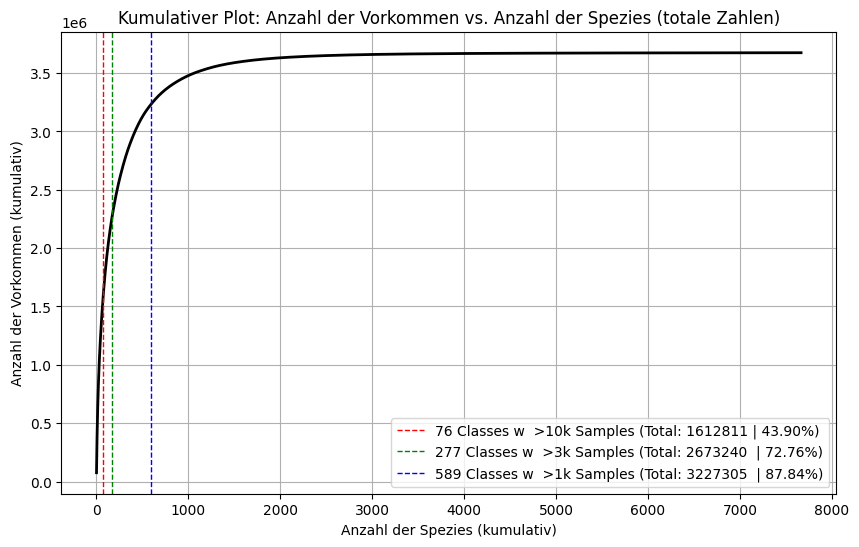

In [6]:
species_counts_sorted = species_counts.sort_values(ascending=False)
cumulative_occurrences = species_counts_sorted.cumsum()
cumulative_species = range(1, len(species_counts_sorted) + 1)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_species, cumulative_occurrences, color='black', lw=2)
plt.axvline(x=76, color='r', lw=1, linestyle='--', 
            label=f'76 Classes w  >10k Samples (Total: {cumulative_occurrences.iloc[75]} | {100*cumulative_occurrences.iloc[75]/cumulative_occurrences.iloc[-1]:.2f}%)')
plt.axvline(x=166, color='g', lw=1, linestyle='--', 
            label=f'277 Classes w  >3k Samples (Total: {cumulative_occurrences.iloc[277]}  | {100*cumulative_occurrences.iloc[277]/cumulative_occurrences.iloc[-1]:.2f}%)')
plt.axvline(x=589, color='b', lw=1, linestyle='--', 
            label=f'589 Classes w  >1k Samples (Total: {cumulative_occurrences.iloc[588]}  | {100*cumulative_occurrences.iloc[588]/cumulative_occurrences.iloc[-1]:.2f}%)')

plt.title('Kumulativer Plot: Anzahl der Vorkommen vs. Anzahl der Spezies (totale Zahlen)')
plt.xlabel('Anzahl der Spezies (kumulativ)')
plt.ylabel('Anzahl der Vorkommen (kumulativ)')
plt.legend()
plt.grid(True)
plt.show()

### Plotting all species with more than 1k samples

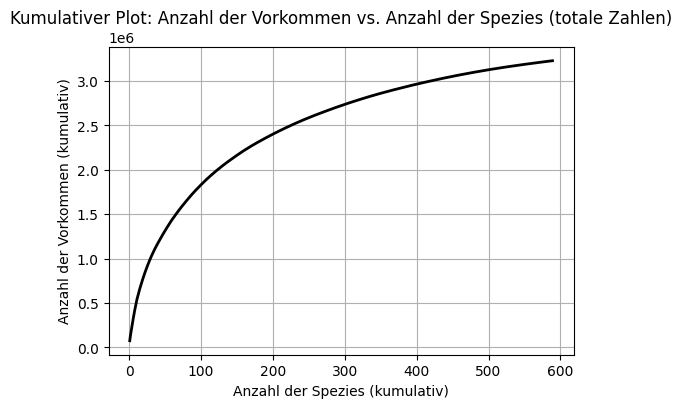

In [7]:
above_1000s_threshold = 589
species_counts_top589 = species_counts.head(above_1000s_threshold)
species_counts_sorted = species_counts_top589.sort_values(ascending=False)


cumulative_occurrences = species_counts_sorted.cumsum()
cumulative_species = range(1, len(species_counts_sorted) + 1)

plt.figure(figsize=(6, 4))
plt.plot(cumulative_species, cumulative_occurrences, color='black', lw=2)
plt.title('Kumulativer Plot: Anzahl der Vorkommen vs. Anzahl der Spezies (totale Zahlen)')
plt.xlabel('Anzahl der Spezies (kumulativ)')
plt.ylabel('Anzahl der Vorkommen (kumulativ)')
plt.grid(True)
plt.show()

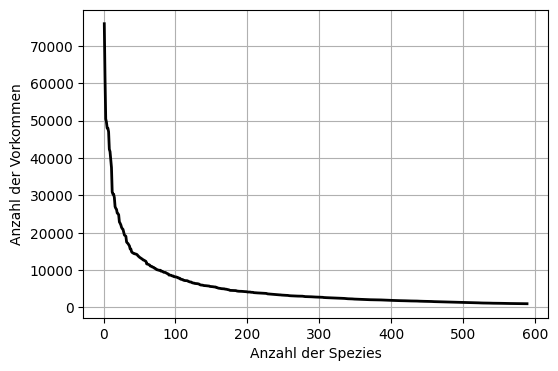

In [8]:
plt.figure(figsize=(6, 4))
plt.plot(cumulative_species, species_counts_sorted, color='black', lw=2)
plt.xlabel('Anzahl der Spezies')
plt.ylabel('Anzahl der Vorkommen')
plt.grid(True)
plt.show()

In [9]:
print(f'Average amount of samples per class: {np.mean(species_counts_top589):.1f}')

Average amount of samples per class: 5479.3


### Calculating dataset size (in occurrences) with different sample amounts

In [10]:
# amount of samples (to download) by selecting at most 10k, 5k, 3k occurrences in all species above 1k
for upper_boundary in [10000, 5000, 3000]:
    above_boudary_species_samples = len(species_counts_top589[species_counts_top589 > upper_boundary]) * upper_boundary
    below_boudary_species_samples = species_counts_top589[species_counts_top589 < upper_boundary].sum()
    print(f"Amount of samples to download with maximum {upper_boundary} images per species: {above_boudary_species_samples + below_boudary_species_samples}")

Amount of samples to download with maximum 10000 images per species: 2374494
Amount of samples to download with maximum 5000 images per species: 1809956
Amount of samples to download with maximum 3000 images per species: 1388034
